In [1]:
library(randomForest)
library(reshape2)
library(dplyr)
library(wordcloud)
library(wordcloud2)
set.seed(27042012)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: RColorBrewer


In [2]:
library(htmlwidgets)

In [3]:
f=read.delim("analysis//significantly_enriched_terms.nr.terms_to_filter.tsv.csv",stringsAsFactors=FALSE)
nrow(f)
head(f)

[1] 30

ID,name
GO:0048513,animal organ development
GO:0048645,animal organ formation
GO:0009887,animal organ morphogenesis
GO:0001825,blastocyst formation
GO:0035690,cellular response to drug
GO:0008144,drug binding


In [4]:
et=read.delim("analysis/significantly_enriched_terms.Benjamini-Hochberg.subnetwork_sets_NEAT.tsv",sep="\t",stringsAsFactors=FALSE)
et=subset(et,group=="subnetworks")
et=subset(et,round(Study.term/Study.total,2)>=0.1)
table(et$partition)


               biological_process                cellular_component 
                              280                                88 
               molecular_function           plant anatomical entity 
                               35                               445 
plant structure development stage 
                              157 

In [5]:
d=read.delim("analysis/significantly_enriched_terms.Benjamini-Hochberg.subnetwork_sets_NEAT.total_number_of_genes_per_term.csv",sep=";",stringsAsFactors=FALSE,row.names=2)
d=d[! row.names(d) %in% f$ID,]
d=d[row.names(d) %in% et$ID,]
d=d[,-1]
nrow(d)
head(d)

[1] 379

,ontology,partition,name,ngenes,IC
GO:0005634,GO,cellular_component,nucleus,12934,4.345686
GO:0005773,GO,cellular_component,vacuole,1083,6.056151
GO:0005829,GO,cellular_component,cytosol,10546,5.809854
GO:0006355,GO,biological_process,"regulation of transcription, DNA-templated",2407,4.589814
GO:0006464,GO,biological_process,cellular protein modification process,3248,3.373649
GO:0006950,GO,biological_process,response to stress,13787,3.366283


In [6]:
o=read.delim("analysis/significantly_enriched_terms.subnetwork_sets.regulators.number_of_downstream_targets.csv",sep=";",check.names=FALSE)
o=o[,row.names(d)]
dim(o)
head(o)

[1] 1667  379

,GO:0005634,GO:0005773,GO:0005829,GO:0006355,GO:0006464,GO:0006950,GO:0006952,GO:0006970,GO:0007154,GO:0007165,⋯,PO:0009052,PO:0009058,PO:0009059,PO:0009060,PO:0020038,PO:0020100,PO:0025022,PO:0025345,PO:0025528,PO:0025606
Pp3c27_3080.mRNA,1183,116,925,194,297,1352,225,797,306,284,⋯,446,459,437,441,450,435,437,915,1811,1890
Pp3c11_23290.mRNA,1182,116,925,193,297,1351,224,796,305,283,⋯,446,459,437,441,450,435,437,914,1810,1889
Pp3c7_2300.mRNA,1182,116,925,193,297,1351,224,796,305,283,⋯,446,459,437,441,450,435,437,914,1810,1889
Pp3c17_23620.mRNA,1182,116,925,193,297,1351,225,796,305,283,⋯,446,459,437,441,450,435,437,915,1810,1889
Pp3c16_13280.mRNA,1182,116,925,193,297,1351,224,796,305,283,⋯,446,459,437,441,449,435,437,914,1810,1889
Pp3c15_11610.mRNA,1183,116,925,194,296,1351,225,796,306,284,⋯,446,459,437,441,450,435,437,914,1810,1889


In [7]:
o=t((t(o)/d$ngenes)/d$IC)
#o=t((t(o)/d$ngenes))
head(o)

,GO:0005634,GO:0005773,GO:0005829,GO:0006355,GO:0006464,GO:0006950,GO:0006952,GO:0006970,GO:0007154,GO:0007165,⋯,PO:0009052,PO:0009058,PO:0009059,PO:0009060,PO:0020038,PO:0020100,PO:0025022,PO:0025345,PO:0025528,PO:0025606
Pp3c27_3080.mRNA,0.02104716,0.01768613,0.01509693,0.01756025,0.02710444,0.02913106,0.02940511,0.02392574,0.04283306,0.04081217,⋯,0.01274495,0.02431621,0.01884955,0.01805307,0.01831043,0.01472121,0.01238587,0.01171885,0.02655785,0.04721711
Pp3c11_23290.mRNA,0.02102937,0.01768613,0.01509693,0.01746973,0.02710444,0.02910951,0.02927442,0.02389572,0.04269308,0.04066847,⋯,0.01274495,0.02431621,0.01884955,0.01805307,0.01831043,0.01472121,0.01238587,0.01170604,0.02654319,0.04719213
Pp3c7_2300.mRNA,0.02102937,0.01768613,0.01509693,0.01746973,0.02710444,0.02910951,0.02927442,0.02389572,0.04269308,0.04066847,⋯,0.01274495,0.02431621,0.01884955,0.01805307,0.01831043,0.01472121,0.01238587,0.01170604,0.02654319,0.04719213
Pp3c17_23620.mRNA,0.02102937,0.01768613,0.01509693,0.01746973,0.02710444,0.02910951,0.02940511,0.02389572,0.04269308,0.04066847,⋯,0.01274495,0.02431621,0.01884955,0.01805307,0.01831043,0.01472121,0.01238587,0.01171885,0.02654319,0.04719213
Pp3c16_13280.mRNA,0.02102937,0.01768613,0.01509693,0.01746973,0.02710444,0.02910951,0.02927442,0.02389572,0.04269308,0.04066847,⋯,0.01274495,0.02431621,0.01884955,0.01805307,0.01826974,0.01472121,0.01238587,0.01170604,0.02654319,0.04719213
Pp3c15_11610.mRNA,0.02104716,0.01768613,0.01509693,0.01756025,0.02701318,0.02910951,0.02940511,0.02389572,0.04283306,0.04081217,⋯,0.01274495,0.02431621,0.01884955,0.01805307,0.01831043,0.01472121,0.01238587,0.01170604,0.02654319,0.04719213


In [8]:
a=read.delim("../analysis//GENIE3.top10_target_ranks.analysed_regulators.tsv",sep="\t",stringsAsFactors=FALSE,row.names=1)
a=a[,-7]
head(a)

,community,degree_centrality,betweenness_centrality,eigenvector_centrality,local_reaching_centrality,centrality_rank,direct_targets,direct_regulator_targets,direct_normal_targets,total_targets,total_regulator_targets,total_normal_targets
Pp3c27_3080.mRNA,I,109,0,0.00000000,0.9977499,1,109,4,105,3104,143,2961
Pp3c11_23290.mRNA,I,552,3190,0.05359921,0.9971070,2,552,43,509,3102,142,2960
Pp3c7_2300.mRNA,I,505,7529,0.02518149,0.9971070,3,505,23,482,3102,142,2960
Pp3c17_23620.mRNA,I,490,1988,0.05419710,0.9971070,4,490,34,456,3102,142,2960
Pp3c16_13280.mRNA,I,485,9982,0.05634423,0.9971070,5,485,37,448,3102,142,2960
Pp3c15_11610.mRNA,I,461,3734,0.04049888,0.9971070,6,461,26,435,3102,142,2960


In [9]:
col=read.delim("../analysis/subnetwork_colours.csv",sep=",",stringsAsFactors=FALSE)
head(col)
a$community=ordered(a$community,levels=col$network)

network,colour
I,#999999
II,#FFE529
III,#5A6A99
IV,#FF7F00
V,#E486B7
VI,#6B886E


In [10]:
table(a$community)
nrow(a)
nrow(na.omit(a))
nrow(o)
nrow(na.omit(o))
nrow(na.omit(scale(o)))


   I   II  III   IV    V   VI  VII VIII   IX    X   XI 
 150  293  116  211  118   87  123  116  256   98   99 

[1] 1667

[1] 1667

[1] 1667

[1] 1667

[1] 1667

In [11]:
O=scale(o)
dim(O)
dim(na.omit(O))
O=O[,apply(O,2,function(x) length(x[is.na(x)])==0)]
dim(O)

[1] 1667  379

[1] 1667  379

[1] 1667  379

In [12]:
A=a[a$centrality_rank<=20, ]
OO=O[row.names(A),]
dim(A)
dim(OO)

[1] 220  12

[1] 220 379

In [13]:
rffit= randomForest(OO,A$community, ntree=10000, keep.forest=TRUE, importance=TRUE,proximity=TRUE)

In [14]:
print(rffit)


Call:
 randomForest(x = OO, y = A$community, ntree = 10000, importance = TRUE,      proximity = TRUE, keep.forest = TRUE) 
               Type of random forest: classification
                     Number of trees: 10000
No. of variables tried at each split: 19

        OOB estimate of  error rate: 0%
Confusion matrix:
      I II III IV  V VI VII VIII IX  X XI class.error
I    20  0   0  0  0  0   0    0  0  0  0           0
II    0 20   0  0  0  0   0    0  0  0  0           0
III   0  0  20  0  0  0   0    0  0  0  0           0
IV    0  0   0 20  0  0   0    0  0  0  0           0
V     0  0   0  0 20  0   0    0  0  0  0           0
VI    0  0   0  0  0 20   0    0  0  0  0           0
VII   0  0   0  0  0  0  20    0  0  0  0           0
VIII  0  0   0  0  0  0   0   20  0  0  0           0
IX    0  0   0  0  0  0   0    0 20  0  0           0
X     0  0   0  0  0  0   0    0  0 20  0           0
XI    0  0   0  0  0  0   0    0  0  0 20           0


In [15]:
options(repr.plot.width=6, repr.plot.height=6)

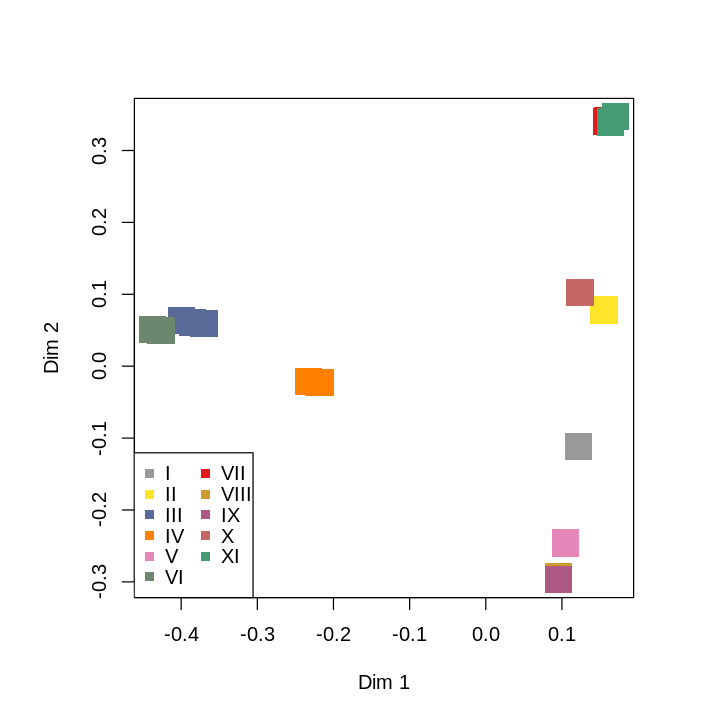

In [16]:
MDSplot(rffit,A$community,palette=col$colour,pch=15,k=2,cex=3)
legend("bottomleft",col=col$colour,legend=col$network,ncol=2,pch=15)

In [17]:
pdf("analysis/significantly_enriched_terms.MDS.pdf")
MDSplot(rffit,A$community,palette=col$colour,pch=15,k=2,cex=3)
legend("bottomleft",col=col$colour,legend=col$network,ncol=2,pch=15)
dev.off()

png 
  2

In [18]:
vi=as.data.frame(importance(rffit))
vi$ID=row.names(vi)
head(vi)

,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,MeanDecreaseAccuracy,MeanDecreaseGini,ID
GO:0005634,13.020620,14.474295,12.292794,9.261941,11.378253,11.835311,11.910257,12.424128,11.094930,12.579308,12.602990,18.96483,0.8619732,GO:0005634
GO:0005773,8.513516,8.639351,8.426434,7.609601,7.994476,9.474845,9.216851,8.202983,7.510805,9.851416,8.548128,14.38355,0.4975879,GO:0005773
GO:0005829,11.449818,13.724981,10.750591,8.399851,10.847597,10.372888,11.759255,11.334785,10.856650,11.456352,10.882747,17.33716,0.7151920,GO:0005829
GO:0006355,9.618832,10.056980,8.362535,7.772242,10.543710,9.625268,9.941211,8.514731,9.132600,10.211248,9.781324,15.44536,0.5574818,GO:0006355
GO:0006464,7.432700,6.957554,6.112207,6.283000,6.690536,6.226579,7.428717,6.682941,7.645154,7.375615,7.541254,12.32629,0.3642786,GO:0006464
GO:0006950,9.460299,9.365841,11.563818,9.215827,7.564343,9.326515,9.556481,7.206204,8.122756,9.667029,9.962417,15.15677,0.5548397,GO:0006950


In [19]:
VI=melt(vi,id.vars=c("ID","MeanDecreaseAccuracy","MeanDecreaseGini"),variable.name="community",value.name="importance")
nrow(VI)
nrow(d)
VI=merge(d,VI,by.x=0,by.y="ID")
names(VI)[1]="ID"
head(VI)

[1] 4169

[1] 379

ID,ontology,partition,name,ngenes,IC,MeanDecreaseAccuracy,MeanDecreaseGini,community,importance
GO:0001101,GO,biological_process,response to acid chemical,11199,5.428143,20.16532,0.939882,VI,11.39296
GO:0001101,GO,biological_process,response to acid chemical,11199,5.428143,20.16532,0.939882,II,12.33998
GO:0001101,GO,biological_process,response to acid chemical,11199,5.428143,20.16532,0.939882,V,13.08400
GO:0001101,GO,biological_process,response to acid chemical,11199,5.428143,20.16532,0.939882,VII,11.57084
GO:0001101,GO,biological_process,response to acid chemical,11199,5.428143,20.16532,0.939882,IV,10.94359
GO:0001101,GO,biological_process,response to acid chemical,11199,5.428143,20.16532,0.939882,I,13.32608


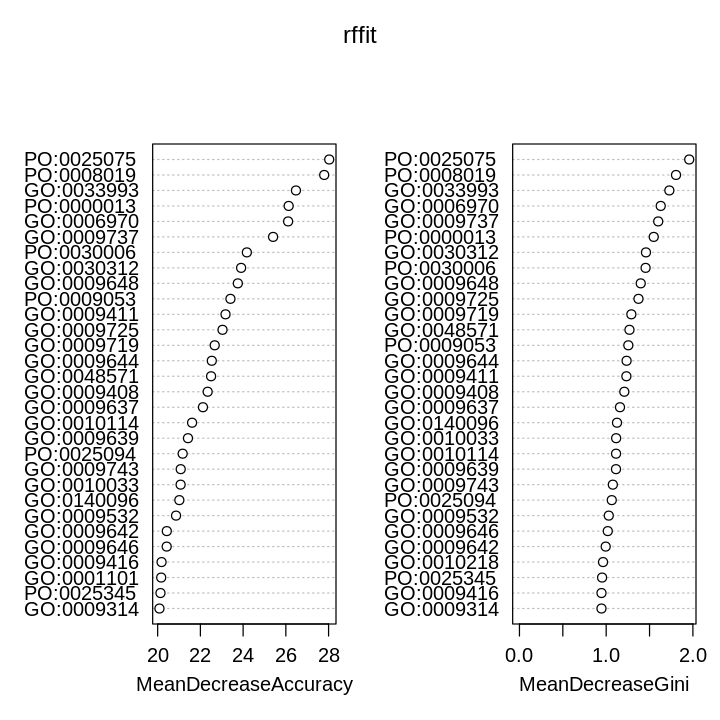

In [20]:
varImpPlot(rffit)

In [21]:
et=read.delim("analysis/significantly_enriched_terms.Benjamini-Hochberg.subnetwork_sets_NEAT.tsv",sep="\t",stringsAsFactors=FALSE)
et=subset(et,group=="subnetworks")
et=et[,-c(1,2,4,5,31)]
nrow(et)
nrow(VI)
et=merge(et,VI,by=c("ID","name","partition","ontology","community"))
et=et[order(-et$importance),]
nrow(et)
et=subset(et,importance>0)
nrow(et)
head(et)

[1] 3729

[1] 4169

[1] 997

[1] 997

,ID,name,partition,ontology,community,Pop.total,Pop.term,Study.total,Study.term,Pop.family,⋯,expected_nab,pvalue,conclusion,fdr,bonferroni,ngenes,IC,MeanDecreaseAccuracy,MeanDecreaseGini,importance
815,PO:0025075,non-vascular leaf,plant anatomical entity,PO,XI,21797,2099,1690,521,20757,⋯,342.0014,0,Overenrichment,0,0,2103,6.109803,28.02950,1.957451,24.93374
82,GO:0006970,response to osmotic stress,biological_process,GO,I,27502,5007,2446,798,14774,⋯,702.7848,0,Overenrichment,0,0,5030,6.622546,26.10634,1.628940,23.98591
261,GO:0033993,response to lipid,biological_process,GO,V,27502,5003,3006,1198,7517,⋯,1215.6882,0,Overenrichment,0,0,5031,5.467364,26.47261,1.728403,21.92916
230,GO:0030312,external encapsulating structure,cellular_component,GO,II,27502,4143,3324,591,22098,⋯,684.6479,0,Overenrichment,0,0,4339,6.233082,23.90602,1.458733,20.77237
152,GO:0009725,response to hormone,biological_process,GO,V,27502,6570,3006,1289,7517,⋯,1308.0318,0,Overenrichment,0,0,6601,5.078706,23.03616,1.372527,20.74839
159,GO:0009737,response to abscisic acid,biological_process,GO,V,27502,4777,3006,1176,11682,⋯,1161.9056,0,Overenrichment,0,0,4799,8.568456,25.40307,1.599986,20.45846


In [22]:
et$community=ordered(et$community,levels=col$network)
et=et %>%
    group_by(community, partition) %>%
    mutate(rank = order(order(importance, decreasing=TRUE)))
et=et[order(et$community, et$partition, et$rank),]

head(et)

ID,name,partition,ontology,community,Pop.total,Pop.term,Study.total,Study.term,Pop.family,⋯,pvalue,conclusion,fdr,bonferroni,ngenes,IC,MeanDecreaseAccuracy,MeanDecreaseGini,importance,rank
GO:0006970,response to osmotic stress,biological_process,GO,I,27502,5007,2446,798,14774,⋯,0,Overenrichment,0,0,5030,6.622546,26.10634,1.6289402,23.98591,1
GO:0009737,response to abscisic acid,biological_process,GO,I,27502,4777,2446,466,11682,⋯,0,Overenrichment,0,0,4799,8.568456,25.40307,1.5999856,16.48831,2
GO:0009408,response to heat,biological_process,GO,I,27502,4505,2446,535,13684,⋯,0,Overenrichment,0,0,4543,7.821242,22.33995,1.2090050,14.91685,3
GO:0009648,photoperiodism,biological_process,GO,I,27502,2337,2446,251,7262,⋯,0,Overenrichment,0,0,2352,7.993092,23.75239,1.3984208,14.31221,4
GO:0010033,response to organic substance,biological_process,GO,I,27502,7517,2446,749,12845,⋯,0,Overenrichment,0,0,7560,3.493977,21.07443,1.1149796,13.56995,5
GO:0007165,signal transduction,biological_process,GO,I,27502,2393,2446,303,13239,⋯,0,Overenrichment,0,0,2259,3.080437,17.36786,0.7259079,13.45852,6


In [23]:
head(unique(et[order(-et$MeanDecreaseAccuracy),c("community","ID","name","fdr","MeanDecreaseAccuracy","MeanDecreaseGini")]),20)

community,ID,name,fdr,MeanDecreaseAccuracy,MeanDecreaseGini
I,PO:0025075,non-vascular leaf,0,28.02950,1.957451
X,PO:0025075,non-vascular leaf,0,28.02950,1.957451
XI,PO:0025075,non-vascular leaf,0,28.02950,1.957451
VIII,PO:0008019,leaf lamina base,0,27.79541,1.805382
II,GO:0033993,response to lipid,0,26.47261,1.728403
V,GO:0033993,response to lipid,0,26.47261,1.728403
XI,GO:0033993,response to lipid,0,26.47261,1.728403
VIII,PO:0000013,cauline leaf,0,26.13136,1.548358
I,GO:0006970,response to osmotic stress,0,26.10634,1.628940
II,GO:0006970,response to osmotic stress,0,26.10634,1.628940


In [24]:
et.sel=subset(et,rank<6 )#& partition %in% c("biological_process","plant anatomical entity","plant structure development stage"))
table(et.sel$partition)
et.sel


               biological_process                cellular_component 
                               55                                52 
               molecular_function           plant anatomical entity 
                               14                                45 
plant structure development stage 
                               40 

ID,name,partition,ontology,community,Pop.total,Pop.term,Study.total,Study.term,Pop.family,⋯,pvalue,conclusion,fdr,bonferroni,ngenes,IC,MeanDecreaseAccuracy,MeanDecreaseGini,importance,rank
GO:0006970,response to osmotic stress,biological_process,GO,I,27502,5007,2446,798,14774,⋯,0,Overenrichment,0,0,5030,6.622546,26.10634,1.6289402,23.985909,1
GO:0009737,response to abscisic acid,biological_process,GO,I,27502,4777,2446,466,11682,⋯,0,Overenrichment,0,0,4799,8.568456,25.40307,1.5999856,16.488308,2
GO:0009408,response to heat,biological_process,GO,I,27502,4505,2446,535,13684,⋯,0,Overenrichment,0,0,4543,7.821242,22.33995,1.2090050,14.916847,3
GO:0009648,photoperiodism,biological_process,GO,I,27502,2337,2446,251,7262,⋯,0,Overenrichment,0,0,2352,7.993092,23.75239,1.3984208,14.312206,4
GO:0010033,response to organic substance,biological_process,GO,I,27502,7517,2446,749,12845,⋯,0,Overenrichment,0,0,7560,3.493977,21.07443,1.1149796,13.569948,5
GO:0005634,nucleus,cellular_component,GO,I,27502,12495,2446,1184,19316,⋯,0,Overenrichment,0,0,12934,4.345686,18.96483,0.8619732,13.020620,1
GO:0012505,endomembrane system,cellular_component,GO,I,27502,2765,2446,293,22098,⋯,0,Overenrichment,0,0,2963,4.713592,17.33979,0.7163801,12.086683,2
GO:0005829,cytosol,cellular_component,GO,I,27502,9851,2446,908,17434,⋯,0,Overenrichment,0,0,10546,5.809854,17.33716,0.7151920,11.449818,3
GO:0031224,intrinsic component of membrane,cellular_component,GO,I,27502,3870,2446,380,4562,⋯,0,Overenrichment,0,0,3930,5.019478,14.60998,0.5277689,8.599803,4
GO:0005773,vacuole,cellular_component,GO,I,27502,3332,2446,345,20455,⋯,0,Overenrichment,0,0,1083,6.056151,14.38355,0.4975879,8.513516,5


In [25]:
table(et$community)
table(et.sel$community)
table(VI$community)


   I   II  III   IV    V   VI  VII VIII   IX    X   XI 
  82   42   44   45   48   13  150  226  227   52   68 


   I   II  III   IV    V   VI  VII VIII   IX    X   XI 
  21   13   16   20   19    9   23   21   24   20   20 


   I   II  III   IV    V   VI  VII VIII   IX    X   XI 
 379  379  379  379  379  379  379  379  379  379  379 

In [26]:
nrow(et.sel)

[1] 206

In [27]:
options(repr.plot.width=8, repr.plot.height=8)

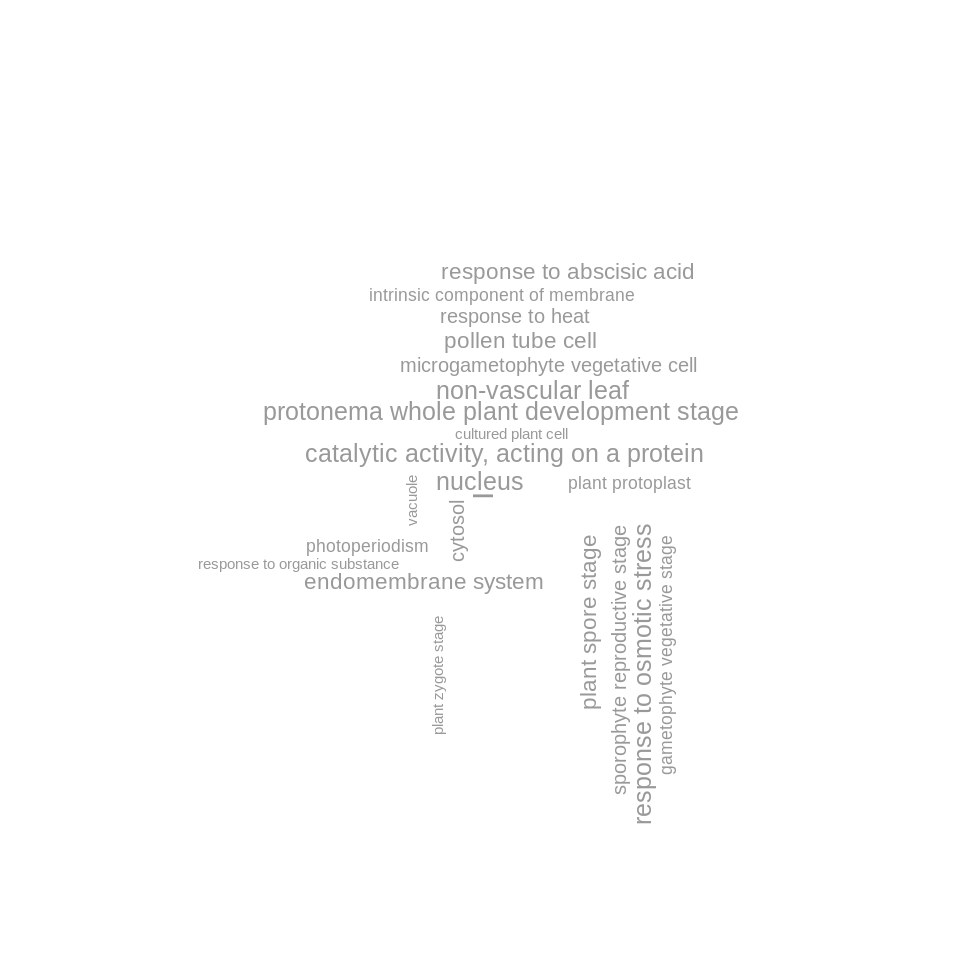

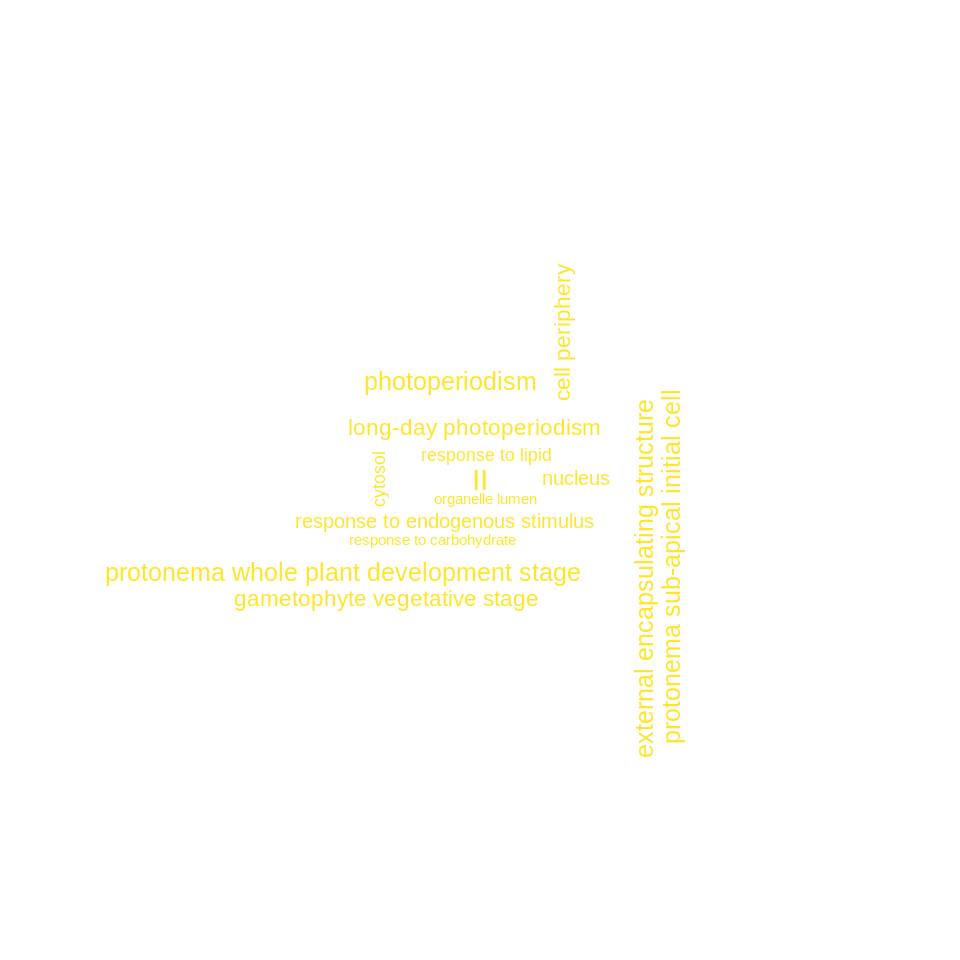

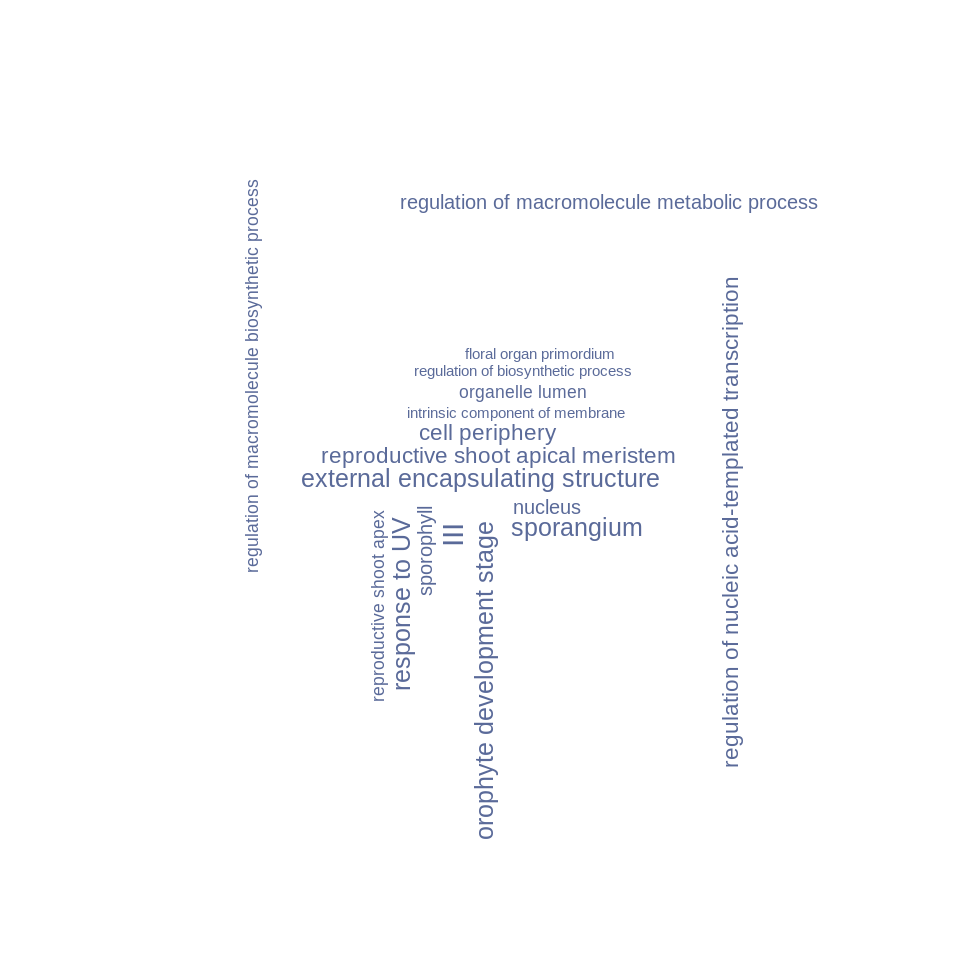

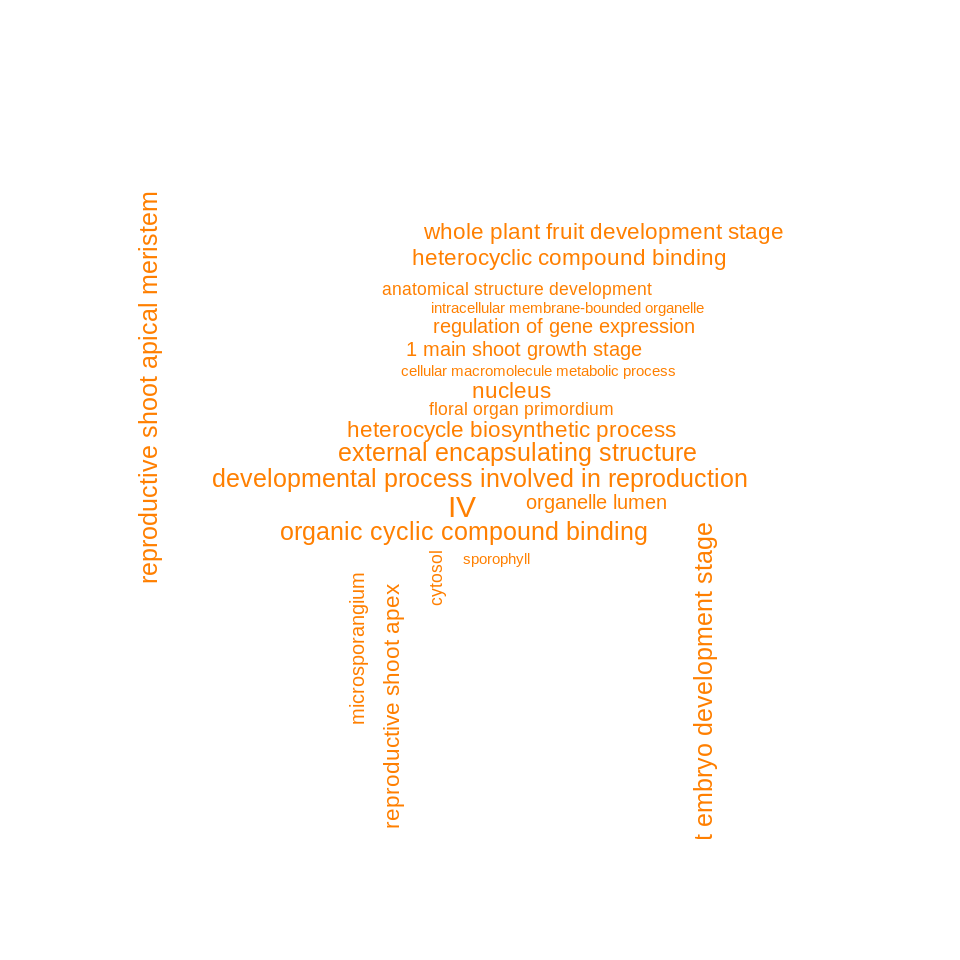

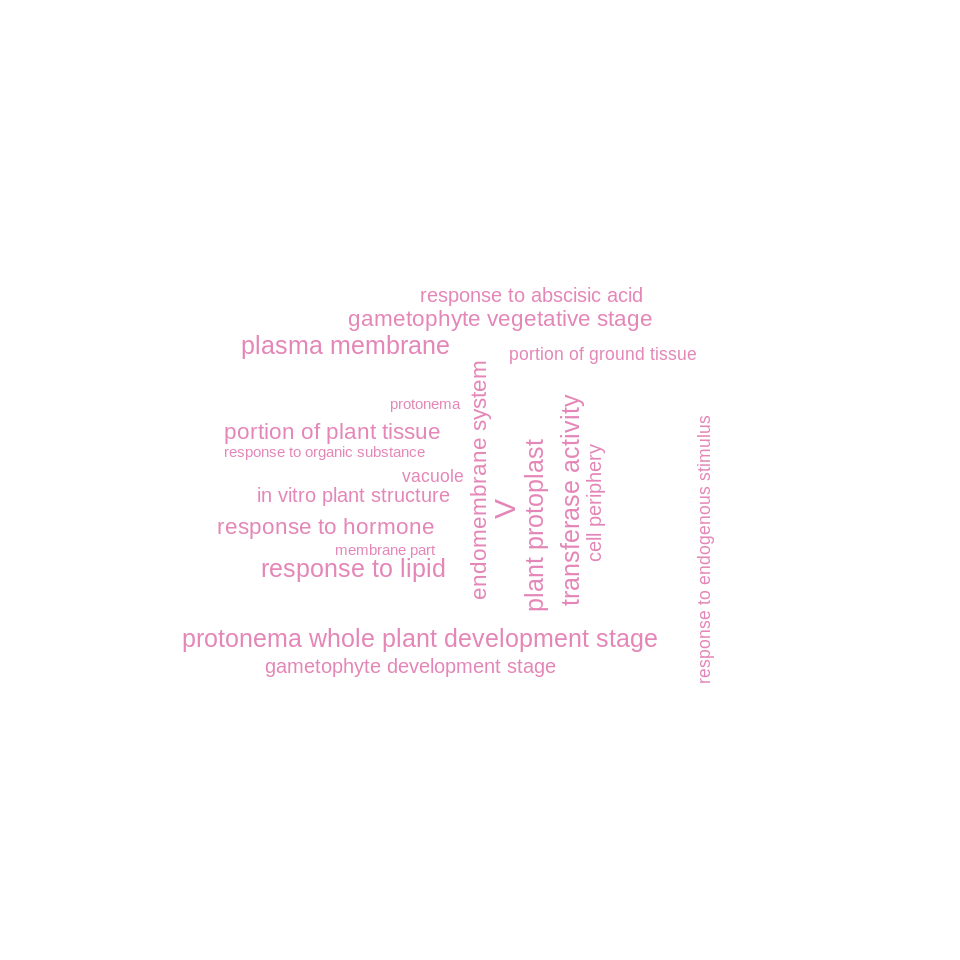

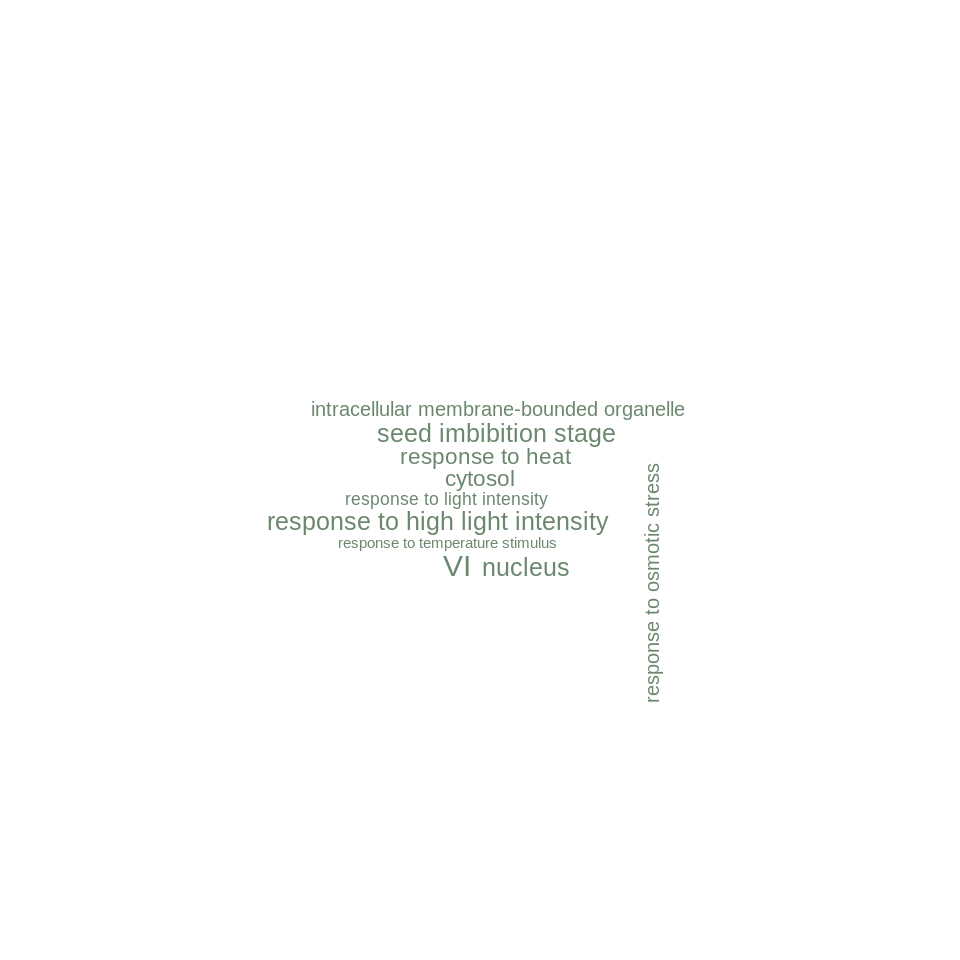

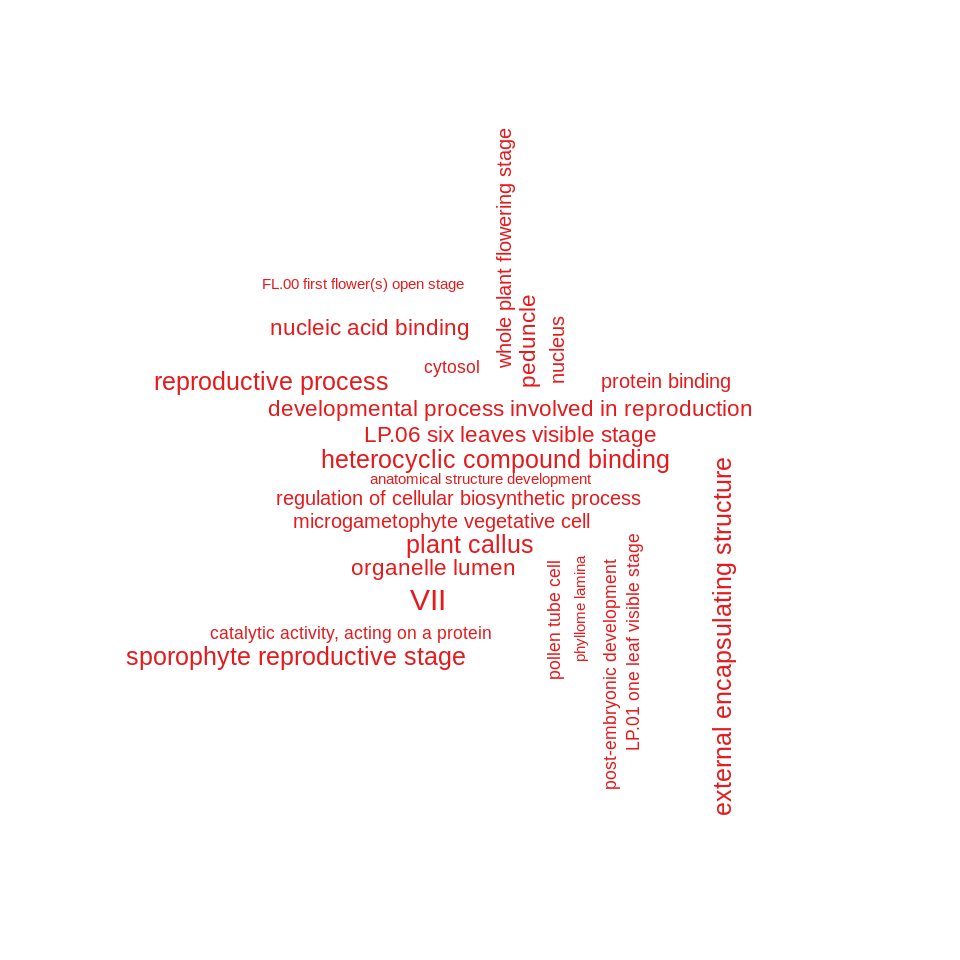

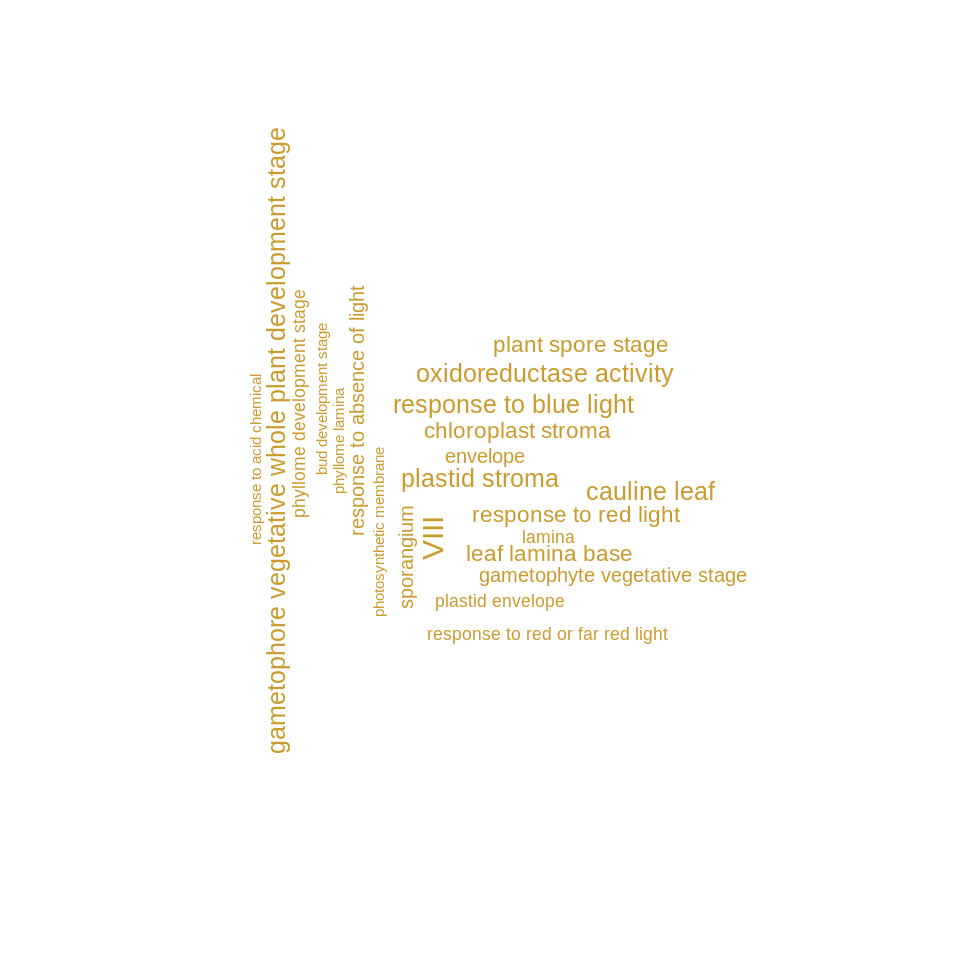

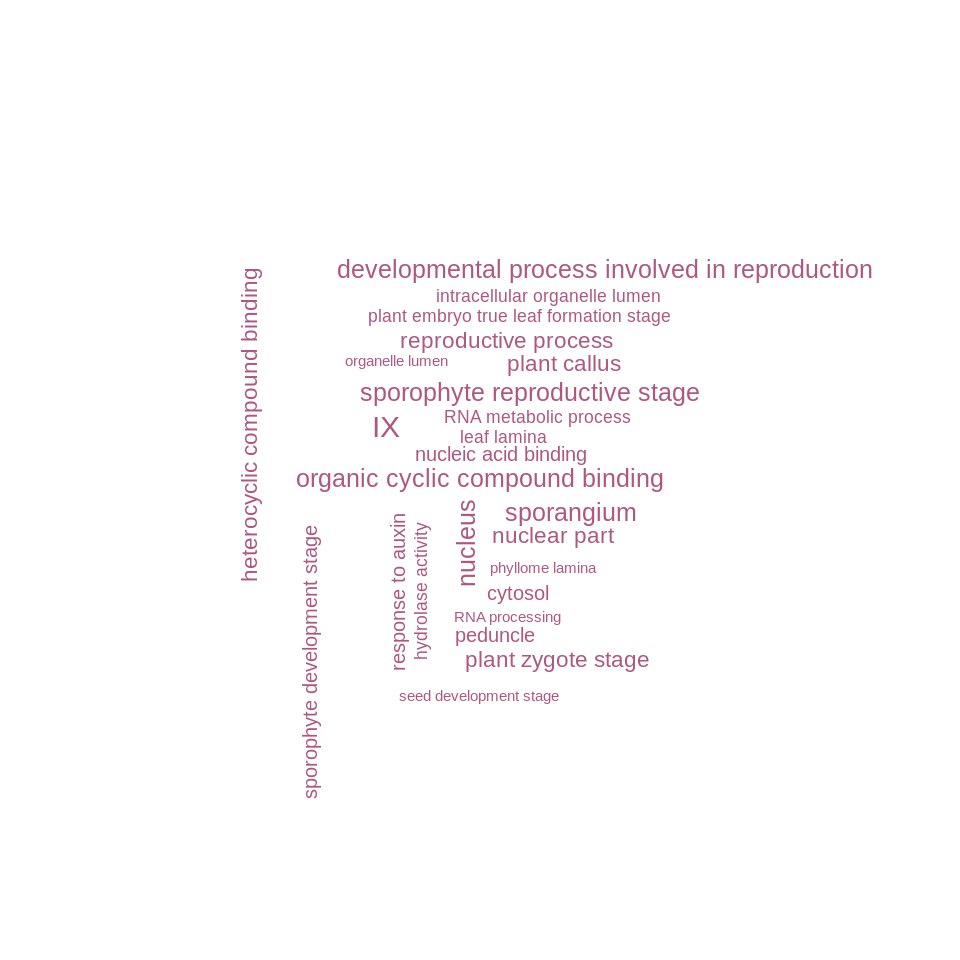

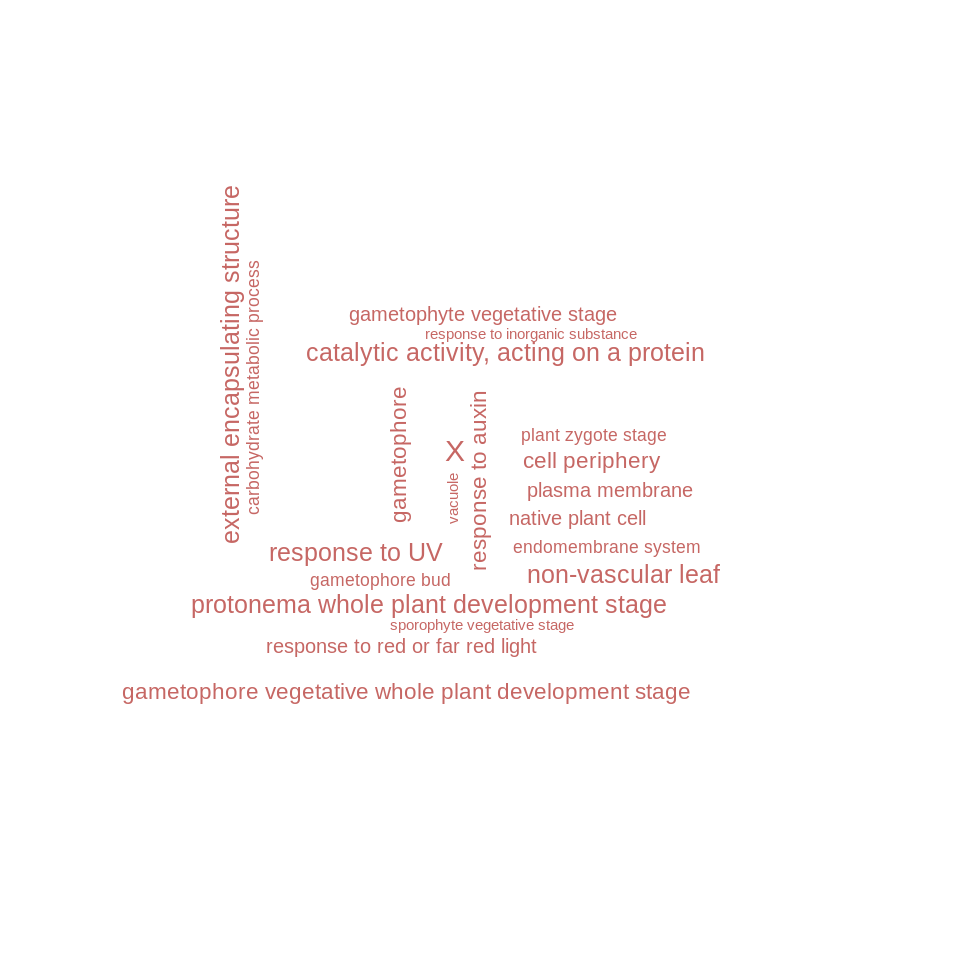

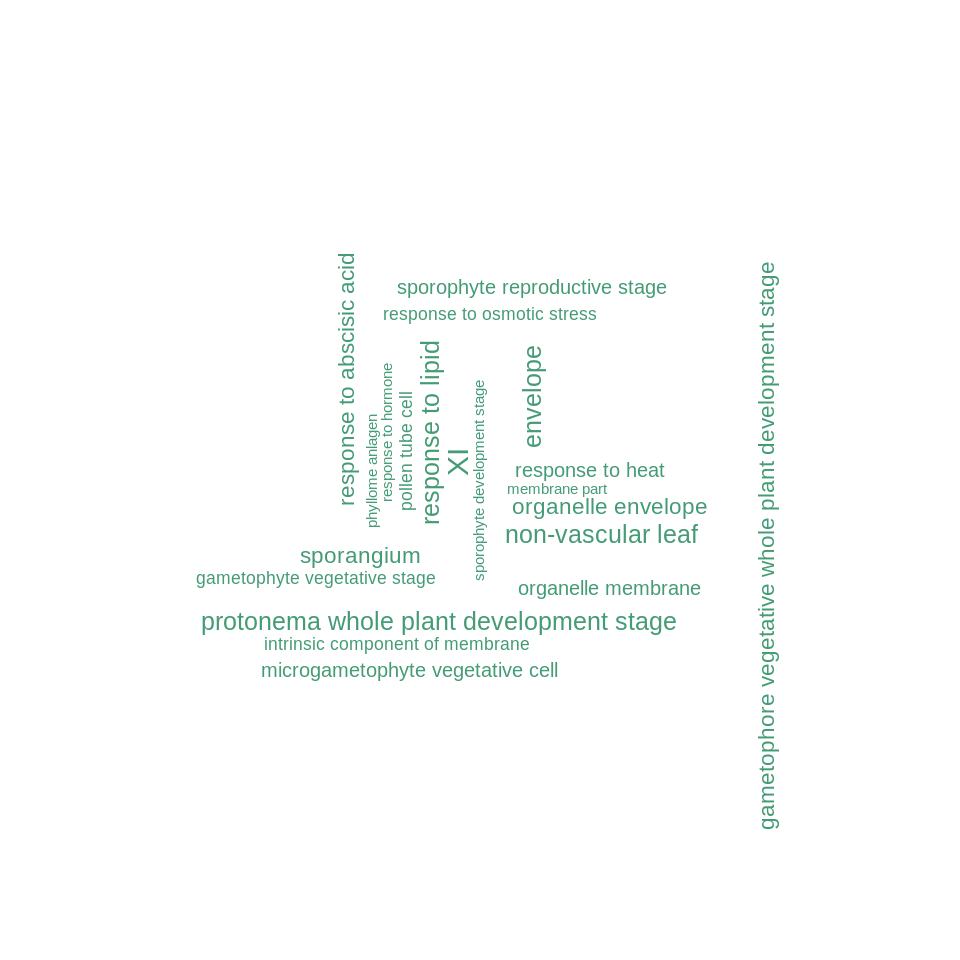

In [28]:
for (i in col$network) {
    tar=subset(et.sel,community==i)
    pdf(sprintf("analysis/significantly_enriched_terms.RF_selection.subnetwork_%s.pdf",i),width=8,height=8) 
    wordcloud(words = c(i,tar$name), freq = c(8,7-tar$rank), min.freq = 1, scale=c(1.5,.5),
          max.words=200, random.order=TRUE, rot.per=0.35, 
          colors=col$colour[col$network==i])
    dev.off()
    wordcloud(words = c(i,tar$name), freq = c(8,7-tar$rank), min.freq = 1, scale=c(1.5,.5),
          max.words=200, random.order=TRUE, rot.per=0.35, 
          colors=col$colour[col$network==i])
}

In [29]:
write.table(et,file="analysis/significantly_enriched_terms.top20regulators.varImportance_randomForest.tsv",sep="\t",row.names=FALSE,col.names=TRUE,quote=FALSE)

In [30]:
now=getwd()
setwd("./wordclouds")
for (i in col$network) {
    tar=subset(et.sel,community==i)
    my_graph=wordcloud2(data.frame(word=c(i,tar$name), freq = c(18,16-tar$rank)), color=col$colour[col$network==i],shape="cloud",size=0.5)
    saveWidget(my_graph,sprintf("significantly_enriched_terms.RF_selection.subnetwork_%s.wordcloud2.html",i),selfcontained = F)
}
setwd(now)